In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps 
#from api_keys import gkey
import requests
from scipy.stats import linregress

#gmaps.configure(api_key=gkey)

In [2]:
file=pd.read_csv('listings.csv')
file=file.drop(['neighbourhood_group','license','number_of_reviews_ltm','calculated_host_listings_count',
                'host_name','name','host_id','reviews_per_month'],axis=1)
cleaned_data=file.loc[(file['latitude']>= -32.5468)&
                      (file['latitude'] <= -31.7725)&
                      (file['longitude'] <= 116.0593)&
                      (file['minimum_nights']<=15)]

cleaned_data=cleaned_data.dropna(how='any').sort_values('latitude',ascending=False)
cleaned_data=cleaned_data[(cleaned_data['room_type']=='Entire home/apt')|((cleaned_data['room_type']=='Private room'))]
cleaned_data.drop(cleaned_data[(cleaned_data['neighbourhood']=='PEPPERMINT GROVE')|
                               (cleaned_data['neighbourhood']=='MURRAY')].index, inplace = True)
cleaned_data

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365
5364,38862794,WANNEROO,-31.77287,115.82548,Private room,40,6,18,12/06/2022,348
3423,24808964,WANNEROO,-31.77314,115.87767,Entire home/apt,110,1,178,14/06/2022,330
3070,22778235,JOONDALUP,-31.77332,115.73488,Entire home/apt,128,2,21,27/08/2021,317
3710,27191991,JOONDALUP,-31.77340,115.73292,Entire home/apt,128,2,52,20/05/2022,231
1003,9395509,JOONDALUP,-31.77361,115.73256,Entire home/apt,850,2,12,19/10/2021,231
...,...,...,...,...,...,...,...,...,...,...
4850,34824234,MANDURAH,-32.54627,115.71089,Entire home/apt,600,2,33,12/06/2022,158
1165,10756742,MANDURAH,-32.54628,115.71190,Entire home/apt,995,2,18,27/02/2022,262
8185,52696667,MANDURAH,-32.54635,115.68733,Entire home/apt,186,3,7,16/06/2022,170
8020,52116476,MANDURAH,-32.54639,115.68400,Entire home/apt,523,3,15,16/05/2022,270


In [3]:
neighbourhoods=cleaned_data[cleaned_data['room_type']=='Entire home/apt']['neighbourhood'].unique()

listAP=[]
listap365=[]
listpr365=[]
listprp=[]
for neighbourhood in neighbourhoods:
    listAP.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Entire home/apt')&(cleaned_data['neighbourhood']==neighbourhood)]['price'].mean(),2))
    listap365.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Entire home/apt')&(cleaned_data['neighbourhood']==neighbourhood)]['availability_365'].mean(),2))
    listpr365.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Private room')&(cleaned_data['neighbourhood']==neighbourhood)]['availability_365'].mean(),2))
    listprp.append(round(cleaned_data.loc[(cleaned_data['room_type']=='Private room')&(cleaned_data['neighbourhood']==neighbourhood)]['price'].mean(),2))

    
final_df=pd.DataFrame({'Neighbourhoods':neighbourhoods,
                               'Apt_365':listap365,
                               'Apt_Price':listAP,
                               'PR_365':listpr365,
                               'PR_Price':listprp})
final_df

,Neighbourhoods,Apt_365,Apt_Price,PR_365,PR_Price
0,WANNEROO,185.89,129.89,330.25,49.75
1,JOONDALUP,141.74,188.82,219.06,79.22
2,SWAN,156.67,163.10,208.00,265.05
3,STIRLING,164.17,193.08,191.35,101.05
4,MUNDARING,112.60,139.00,77.50,45.00
5,BAYSWATER,168.93,144.42,181.67,61.04
6,BASSENDEAN,170.36,132.93,209.14,48.57
7,CAMBRIDGE,150.11,197.64,228.43,92.43
8,VINCENT,159.93,148.63,140.22,91.65
9,BELMONT,203.00,159.45,149.19,60.24


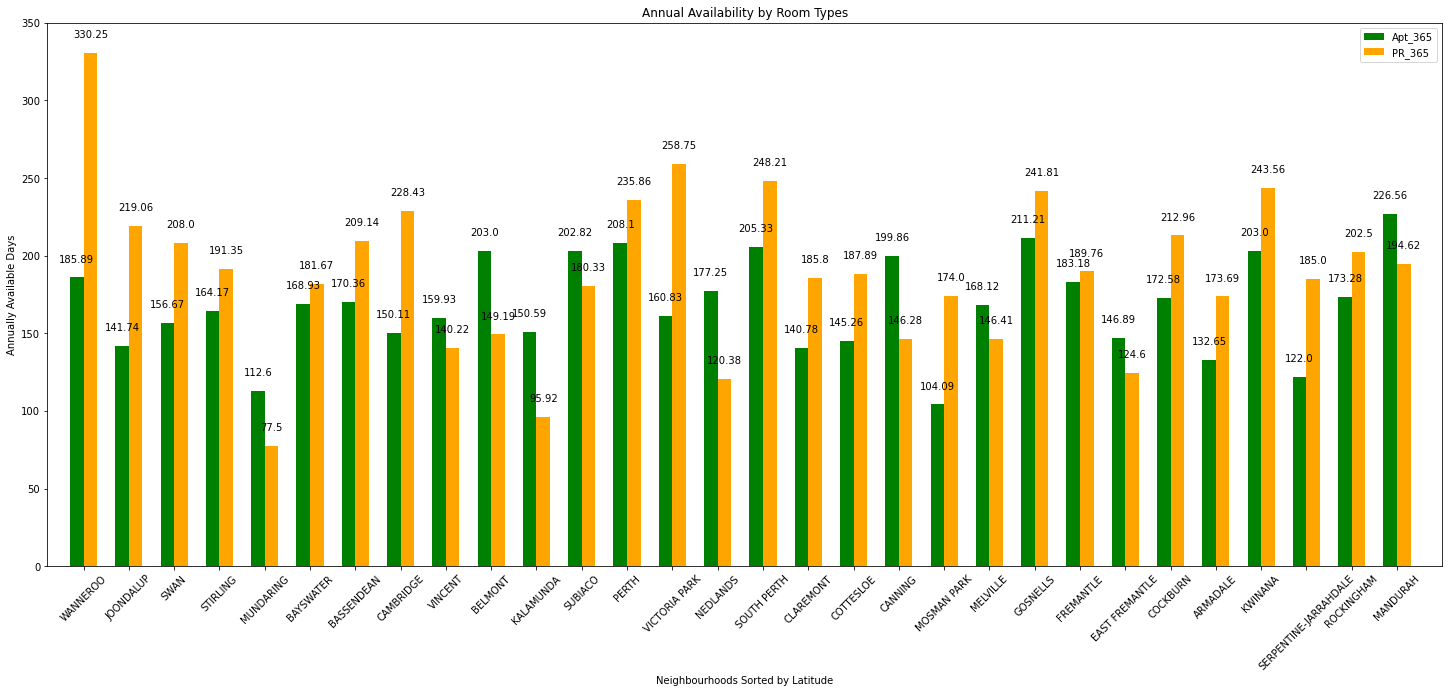

In [4]:
x_ticks=final_df['Neighbourhoods']
x_axis=np.arange(len(x_ticks))
xvalue=final_df['Apt_365']
x1value=final_df['PR_365']
plt.figure(figsize=(25, 10))
plt.bar(x_axis-0.15,xvalue,facecolor='green',align='center',width=0.3,)
plt.bar(x_axis+0.15,x1value,facecolor='orange',align='center',width=0.3)
for x,y in enumerate(final_df['Apt_365']):
    plt.text(x-0.15,y+10,'%s'%y,ha='center')
for x,y in enumerate(final_df['PR_365']):
    plt.text(x+0.15,y+10,'%s'%y,ha='center')


tick_locations = [value for value in x_axis]
labels=['Apt_365','PR_365']
plt.xticks(tick_locations,x_ticks,rotation=45)
plt.title('Annual Availability by Room Types')
plt.xlabel('Neighbourhoods Sorted by Latitude')
plt.ylabel('Annually Available Days')
plt.xlim(-0.8,30)
plt.ylim(0,350)
plt.legend(labels);

In [ ]:
x_ticks=final_df['Neighbourhoods']
x_axis=np.arange(len(x_ticks))
xvalue=final_df['Apt_Price']
x1value=final_df['PR_Price']
plt.figure(figsize=(25, 10))
plt.bar(x_axis-0.15,xvalue,facecolor='green',align='center',width=0.3,)
plt.bar(x_axis+0.15,x1value,facecolor='orange',align='center',width=0.3)
for x,y in enumerate(final_df['Apt_Price']):
    plt.text(x-0.15,y+10,'%s'%y,ha='center')
for x,y in enumerate(final_df['PR_Price']):
    plt.text(x+0.15,y+10,'%s'%y,ha='center')


tick_locations = [value for value in x_axis]
labels=['Apt_Price','PR_Price']
plt.xticks(tick_locations,x_ticks,rotation=45)
plt.title('Price by Room Types')
plt.xlabel('Neighbourhoods Sorted by Latitude')
plt.ylabel('Price Per Night')
plt.xlim(-0.8,30)
plt.ylim(0,max(xvalue)+50)
plt.legend(labels);

In [ ]:
fig=gmaps.figure(center=(-31.975,115.8333),zoom_level=11)
lat=[latitude for latitude in file['latitude']]
lng=[longitude for longitude in file['longitude']]
locations=list(zip(lat,lng))
weights=file['price']
heat_layer=gmaps.heatmap_layer(locations,weights=weights,max_intensity = 500,point_radius = 5)
fig.add_layer(heat_layer)
fig

In [ ]:
lat=[]
lng=[]
for city in final_df['Neighbourhoods']:
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={city},Australia&key={gkey}"
    geo_data = requests.get(target_url).json()
    lat.append(geo_data['results'][0]['geometry']['location']['lat'])
    lng.append(geo_data['results'][0]['geometry']['location']['lng'])

locations=list(zip(lat,lng))
len(locations)

In [ ]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Neighbourhoods}</dd>
<dt>Type</dt><dt>Entire home/apt</dt>
<dt>Price</dt><dd>{Apt_Price}</dd>
</dl>
"""
city_info = [info_box_template.format(**row) for index, row in final_df.iterrows()]
fig=gmaps.figure()
markers=gmaps.marker_layer(locations,info_box_content=city_info)
fig.add_layer(markers)
fig


In [ ]:
x=final_df['Apt_Price']
y=final_df['Apt_365']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regression_value=round(slope,2)*x+round(intercept,2)
function=f'y='+str(round(slope,2))+'x+'+str(round(intercept,2))


plt.scatter(x,y,facecolor='green')
plt.plot(x,regression_value,color='red',linewidth=1.5)
plt.annotate(function,xy=(300,130),fontsize=20)
plt.title('The relationship Between Price and Availibility')
plt.xlabel('Price for Entire home/apt')
plt.ylabel('Availibility days for home/apt')
plt;

In [ ]:
print(rvalue)

In [ ]:
x=final_df.drop(final_df[final_df['Neighbourhoods']=='SOUTH PERTH'].index)['Apt_Price']
y=final_df.drop(final_df[final_df['Neighbourhoods']=='SOUTH PERTH'].index)['Apt_365']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regression_value=round(slope,2)*x+round(intercept,2)
function=f'y='+str(round(slope,2))+'x+'+str(round(intercept,2))


plt.scatter(x,y,facecolor='green')
plt.plot(x,regression_value,color='red',linewidth=1.5)
plt.annotate(function,xy=(300,130),fontsize=20)
plt.title('The relationship Between Price and Availibility')
plt.xlabel('Price for Entire home/apt')
plt.ylabel('Availibility days for home/apt')
plt;

In [ ]:
print(rvalue)

In [ ]:
x=final_df['PR_Price']
y=final_df['PR_365']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regression_value=round(slope,2)*x+round(intercept,2)
function=f'y='+str(round(slope,2))+'x+'+str(round(intercept,2))


plt.scatter(x,y,facecolor='green')
plt.plot(x,regression_value,color='red',linewidth=1.5)
plt.annotate(function,xy=(100,100),fontsize=20)
plt.title('The relationship Between Price and Availibility')
plt.xlabel('Price for Private Room')
plt.ylabel('Availibility days for Private Room')
plt;

In [ ]:
print(rvalue)

In [ ]:
x=final_df.drop(final_df[final_df['Neighbourhoods']=='WANNEROO'].index)['PR_Price']
y=final_df.drop(final_df[final_df['Neighbourhoods']=='WANNEROO'].index)['PR_365']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regression_value=round(slope,2)*x+round(intercept,2)
function=f'y='+str(round(slope,2))+'x+'+str(round(intercept,2))


plt.scatter(x,y,facecolor='green')
plt.plot(x,regression_value,color='red',linewidth=1.5)
plt.annotate(function,xy=(100,100),fontsize=20)
plt.title('The relationship Between Price and Availibility')
plt.xlabel('Price for Private Room')
plt.ylabel('Availibility days for Private Room')
plt;

In [ ]:
print(rvalue)